# Chapter 14: The Central Limit Theorem (CLT)

## Introduction: The Ubiquitous Bell Curve

In the previous chapter, we explored the Law of Large Numbers (LLN), which tells us that the average of a large number of independent and identically distributed (IID) random variables converges to the expected value. That's about the *value* it approaches. But what about the *distribution* of that average? Does it have a predictable shape?

Enter the Central Limit Theorem (CLT), often considered one of the most remarkable and useful results in probability theory. In essence, the CLT states that the distribution of the sum (or average) of a large number of IID random variables tends towards a Normal (Gaussian) distribution, *regardless of the shape of the original distribution* from which the variables are drawn, provided the original distribution has a finite variance.

This is profound! It explains why the Normal distribution appears so frequently in nature and in data analysis. Many real-world phenomena can be thought of as the sum or average of many small, independent effects (e.g., measurement errors, height influenced by many genetic and environmental factors), and the CLT predicts that these resulting phenomena will be approximately Normally distributed.

In this chapter, we will:
1. Formally state the Central Limit Theorem.
2. Understand the concept of convergence in distribution.
3. Discuss the conditions required for the CLT to hold and its limitations.
4. Explore key applications, particularly the Normal approximation to other distributions.
5. Use Python simulations to visualize the CLT in action and apply it to problems.

Let's start by stating the theorem more formally.

## Statement and Intuition

**The Central Limit Theorem (Lindeberg–Lévy CLT):**

Let $X_1, X_2, \dots, X_n$ be a sequence of $n$ independent and identically distributed (IID) random variables, each having a finite expected value $\mu$ and a finite non-zero variance $\sigma^2$.
Let $\bar{X}_n = \frac{1}{n} \sum_{i=1}^{n} X_i$ be the sample mean.
As $n \to \infty$, the distribution of the standardized sample mean converges to a standard Normal distribution:

$$ Z_n = \frac{\bar{X}_n - \mu}{\sigma/\sqrt{n}} \xrightarrow{d} N(0, 1) $$

Where $\xrightarrow{d}$ denotes convergence in distribution.

**Intuition:**
Imagine you have *any* distribution for a single random variable $X$ (as long as its variance isn't infinite). This could be a Uniform distribution (like rolling a fair die), an Exponential distribution (like waiting times), or something completely irregular.
Now, take a sample of $n$ values from this distribution and calculate their average, $\bar{X}_n$. Repeat this process many times, collecting many sample averages.
The CLT tells us that if $n$ is sufficiently large, the histogram of these collected sample averages will look like a bell curve (a Normal distribution).

Furthermore, the theorem specifies the parameters of this Normal distribution:
* The mean of the distribution of sample means ($\mu_{\bar{X}_n}$) is the same as the original distribution's mean ($\mu$).
* The standard deviation of the distribution of sample means ($\sigma_{\bar{X}_n}$), often called the **standard error**, is the original standard deviation divided by the square root of the sample size ($\sigma/\sqrt{n}$).

**Example:** Think about the average weight of 30 randomly chosen apples. Individual apple weights might follow some distribution (maybe skewed, maybe multimodal), but the CLT suggests that the distribution of the *average* weight calculated from samples of 30 apples will be approximately Normal. The more apples we average ($n=50, n=100$), the closer the distribution of the average weight will be to a perfect Normal distribution.

## Convergence in Distribution

The CLT uses the concept of **convergence in distribution**. This is different from *convergence in probability* which we saw with the Weak Law of Large Numbers (WLLN).

* **Convergence in Probability (WLLN):** The *value* of the sample mean $\bar{X}_n$ gets arbitrarily close to the true mean $\mu$ as $n$ increases. $P(|\bar{X}_n - \mu| > \epsilon) \to 0$.
* **Convergence in Distribution (CLT):** The *shape* of the probability distribution of the (standardized) sample mean $Z_n = (\bar{X}_n - \mu) / (\sigma/\sqrt{n})$ gets arbitrarily close to the shape of the standard Normal distribution $N(0, 1)$ as $n$ increases. Formally, the Cumulative Distribution Function (CDF) of $Z_n$ converges to the CDF of the standard Normal distribution at every point where the standard Normal CDF is continuous (which is everywhere for the Normal distribution).
    $$ \lim_{n \to \infty} P(Z_n \le z) = \Phi(z) $$
    where $\Phi(z)$ is the CDF of the standard Normal distribution.

This means that for large $n$, we can approximate the probability $P(\bar{X}_n \le x)$ by using the Normal distribution $N(\mu, \sigma^2/n)$. Specifically:
$$ P(\bar{X}_n \le x) \approx \Phi\left(\frac{x - \mu}{\sigma/\sqrt{n}}\right) $$

Similarly, for the sum $S_n = \sum_{i=1}^{n} X_i$, we know $E[S_n] = n\mu$ and $Var(S_n) = n\sigma^2$. The CLT implies:
$$ \frac{S_n - n\mu}{\sqrt{n}\sigma} \xrightarrow{d} N(0, 1) $$
So, we can approximate the distribution of the sum $S_n$ using $N(n\mu, n\sigma^2)$.

## Conditions and Limitations

The power of the CLT is immense, but it's crucial to understand its requirements:

1.  **Independent and Identically Distributed (IID) Variables:** The standard version of the CLT assumes the random variables $X_i$ are independent and drawn from the same distribution. There are extensions (like the Lyapunov CLT or Lindeberg-Feller CLT) that relax these conditions, particularly the identical distribution part, but they require more complex conditions. For many practical applications, the IID assumption is a reasonable starting point.
2.  **Finite Variance ($\sigma^2 < \infty$):** The original distribution *must* have a finite variance. If the variance is infinite (e.g., the Cauchy distribution), the sample mean does not converge to a Normal distribution. The sample mean's distribution might still converge, but to a different type of stable distribution.
3.  **Sufficiently Large Sample Size ($n$):** The theorem states convergence *as $n \to \infty$*. In practice, "sufficiently large" depends heavily on the shape of the original distribution.
    * If the original distribution is already symmetric and close to Normal, $n$ can be quite small (even $n<10$).
    * If the original distribution is highly skewed (like Exponential), $n$ might need to be larger (e.g., $n \ge 30$ or $n \ge 50$) for the Normal approximation to be reasonably accurate.
    * There's no single magic number for $n$, but $n=30$ is a commonly cited, often overly simplistic, rule of thumb. Visualization (like we'll do in the hands-on section) is key.
4.  **Applies to Sums or Averages:** The CLT specifically describes the distribution of the *sum* or *average* of random variables, not the distribution of the individual variables themselves.

## Applications: The Normal Approximation

One of the most frequent applications of the CLT is approximating probabilities for distributions that are difficult to calculate directly, especially sums of random variables.

**Approximating the Binomial Distribution:**
Recall that a Binomial random variable $X \sim Binomial(n, p)$ can be seen as the sum of $n$ independent Bernoulli($p$) random variables: $X = \sum_{i=1}^{n} Y_i$, where $Y_i \sim Bernoulli(p)$.
Each $Y_i$ has mean $\mu = p$ and variance $\sigma^2 = p(1-p)$.
By the CLT, if $n$ is large enough, the sum $X$ will be approximately Normally distributed.
* Mean: $E[X] = n\mu = np$
* Variance: $Var(X) = n\sigma^2 = np(1-p)$
So, $X \approx N(np, np(1-p))$.

A common rule of thumb for this approximation to be adequate is $np \ge 5$ and $n(1-p) \ge 5$. Some sources use $np \ge 10$ and $n(1-p) \ge 10$ for better accuracy.

**Continuity Correction:** When approximating a discrete distribution (like Binomial) with a continuous one (Normal), accuracy is improved by using a **continuity correction**. Since a Normal variable can take any value, while a Binomial variable only takes integer values, we adjust the interval.
* To approximate $P(X \le k)$, we calculate $P(Y \le k + 0.5)$ where $Y$ is the Normal approximation.
* To approximate $P(X \ge k)$, we calculate $P(Y \ge k - 0.5)$.
* To approximate $P(X = k)$, we calculate $P(k - 0.5 \le Y \le k + 0.5)$.
* To approximate $P(a \le X \le b)$, we calculate $P(a - 0.5 \le Y \le b + 0.5)$.

**Example:** What is the probability of getting more than 60 heads in 100 flips of a fair coin?
Here, $X \sim Binomial(n=100, p=0.5)$.
Mean $\mu = np = 100 \times 0.5 = 50$.
Variance $\sigma^2 = np(1-p) = 100 \times 0.5 \times 0.5 = 25$. Standard deviation $\sigma = \sqrt{25} = 5$.
Since $np = 50 \ge 5$ and $n(1-p) = 50 \ge 5$, we can use the Normal approximation $Y \sim N(50, 25)$.
We want $P(X > 60)$, which is the same as $P(X \ge 61)$.
Using continuity correction, we approximate this by $P(Y \ge 61 - 0.5) = P(Y \ge 60.5)$.
Standardize the value: $Z = \frac{60.5 - 50}{5} = \frac{10.5}{5} = 2.1$.
So we need $P(Z \ge 2.1)$, where $Z \sim N(0, 1)$.
Using a standard Normal table or `scipy.stats`:
$P(Z \ge 2.1) = 1 - P(Z < 2.1) \approx 1 - 0.9821 = 0.0179$.
The probability is approximately 1.79%.

Other applications include:
* **Confidence Intervals:** The CLT underpins the construction of confidence intervals for population means, even when the population distribution is unknown.
* **Hypothesis Testing:** Many statistical tests rely on the assumption that sample means are Normally distributed for large samples.

## Hands-on: Simulating the Central Limit Theorem

Let's use Python to see the CLT in action. We'll simulate taking averages from a non-Normal distribution (the Exponential distribution) and see how the distribution of these averages becomes Normal as the sample size $n$ increases.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Set parameters for the simulation
# We'll use the Exponential distribution
# Lambda (rate parameter) for Exponential
lambda_param = 1.0 
# Theoretical mean (mu) = 1/lambda
theo_mean = 1 / lambda_param
# Theoretical variance (sigma^2) = 1/lambda^2
theo_var = 1 / (lambda_param**2)
# Theoretical standard deviation (sigma)
theo_std_dev = np.sqrt(theo_var) 

# Number of simulations (number of sample means to generate)
num_simulations = 10000 

# Sample sizes (n) to test
sample_sizes = [1, 2, 5, 10, 30, 100] 

print(f"Original Distribution: Exponential(lambda={lambda_param})")
print(f"Theoretical Mean (mu): {theo_mean:.4f}")
print(f"Theoretical Variance (sigma^2): {theo_var:.4f}")
print(f"Theoretical Std Dev (sigma): {theo_std_dev:.4f}\n")

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
# Flatten axes array for easy iteration
axes = axes.ravel() 

# --- Simulation Loop ---
for i, n in enumerate(sample_sizes):
    # Store the means of samples
    sample_means = [] 
    for _ in range(num_simulations):
        # 1. Draw n samples from the Exponential distribution
        samples = np.random.exponential(scale=1/lambda_param, size=n)
        # 2. Calculate the mean of these n samples
        current_mean = np.mean(samples)
        # 3. Store the mean
        sample_means.append(current_mean)
    
    # --- Plotting ---
    ax = axes[i]
    # Plot histogram of the sample means
    ax.hist(sample_means, bins=50, density=True, alpha=0.7, label='Sample Means Hist')
    
    # Calculate theoretical mean and std dev for the sample mean distribution (CLT prediction)
    clt_mean = theo_mean
    clt_std_dev = theo_std_dev / np.sqrt(n)
    
    # Generate points for the theoretical Normal PDF curve
    x_values = np.linspace(min(sample_means), max(sample_means), 200)
    clt_pdf = stats.norm.pdf(x_values, loc=clt_mean, scale=clt_std_dev)
    
    # Plot the theoretical Normal PDF
    ax.plot(x_values, clt_pdf, 'r-', lw=2, label='CLT Normal PDF')
    
    ax.set_title(f'Distribution of Sample Means (n={n})')
    ax.set_xlabel('Sample Mean Value')
    ax.set_ylabel('Density')
    ax.legend()

plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

**Observation:**
Notice how the histogram of sample means starts highly skewed (similar to the original Exponential distribution) when $n=1$. As the sample size $n$ increases (from 2, 5, 10, 30, to 100), the shape of the histogram becomes increasingly symmetric and bell-shaped, closely matching the red curve representing the Normal distribution predicted by the CLT ($N(\mu, \sigma^2/n)$). For $n=30$ and especially $n=100$, the fit is remarkably good, even though the original data came from a very non-Normal, skewed Exponential distribution.

### Using Q-Q Plots for Visual Assessment

A Quantile-Quantile (Q-Q) plot is another excellent tool to visually check if a dataset follows a particular distribution (in this case, Normal). It plots the quantiles of the sample data against the theoretical quantiles of the target distribution. If the data follows the distribution, the points should fall approximately along a straight line.

Let's generate Q-Q plots for our sample means for different $n$.

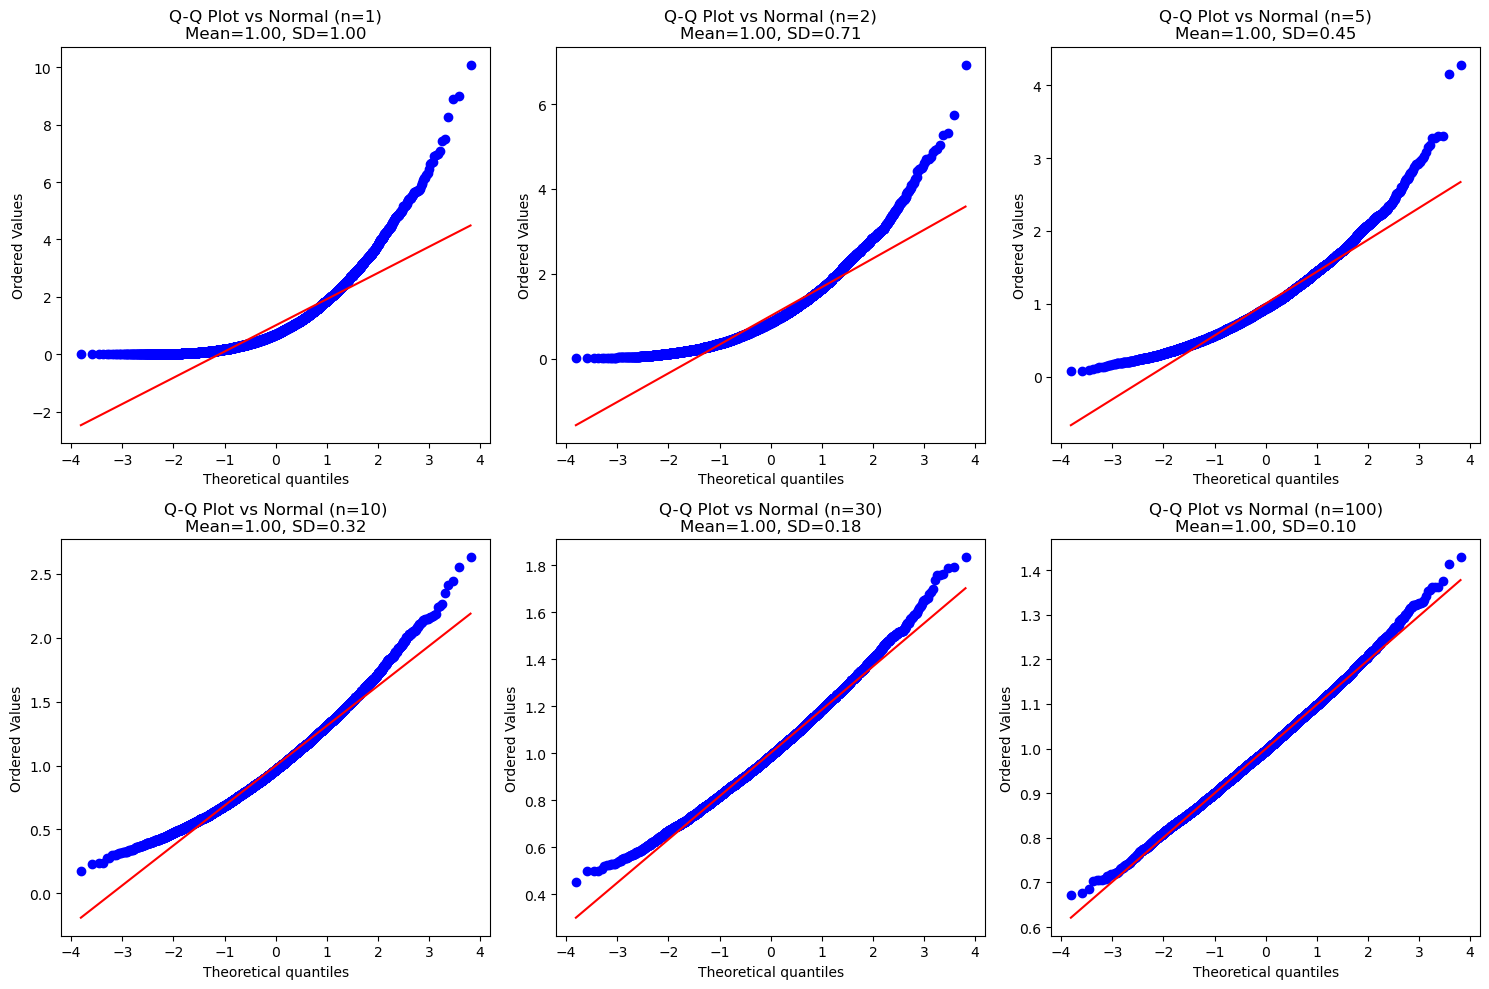

In [10]:
fig_qq, axes_qq = plt.subplots(2, 3, figsize=(15, 10))
axes_qq = axes_qq.ravel()

# --- Simulation and Q-Q Plot Loop ---
for i, n in enumerate(sample_sizes):
    # Regenerate sample means for clarity (could reuse from above)
    sample_means_qq = []
    for _ in range(num_simulations):
        samples = np.random.exponential(scale=1/lambda_param, size=n)
        current_mean = np.mean(samples)
        sample_means_qq.append(current_mean)
        
    ax_qq = axes_qq[i]
    # Create Q-Q plot against the Normal distribution
    # stats.probplot generates the plot directly
    stats.probplot(sample_means_qq, dist="norm", plot=ax_qq) 
    
    # Calculate theoretical parameters for title
    clt_mean = theo_mean
    clt_std_dev = theo_std_dev / np.sqrt(n)
    
    ax_qq.set_title(f'Q-Q Plot vs Normal (n={n})\nMean={clt_mean:.2f}, SD={clt_std_dev:.2f}')

plt.tight_layout()
plt.show()

**Observation:**
The Q-Q plots reinforce our findings. For small $n$ (like $n=1, n=2$), the points deviate significantly from the straight red line, especially at the tails, indicating non-Normality. As $n$ increases, the points align much more closely with the line, showing that the distribution of sample means is increasingly well-approximated by a Normal distribution. For $n=30$ and $n=100$, the points lie almost perfectly on the line.

### Hands-on: Normal Approximation to Binomial

Let's verify the coin flip example calculation ($P(X > 60)$ for $X \sim Binomial(100, 0.5)$) using Python.

In [14]:
# Parameters for Binomial
n_binom = 100
p_binom = 0.5

# Calculate exact probability using Binomial CDF/SF
# P(X > 60) = P(X >= 61) = 1 - P(X <= 60)
# Using Survival Function (SF = 1 - CDF) is often more numerically stable for upper tail
exact_prob = stats.binom.sf(k=60, n=n_binom, p=p_binom)

# Calculate parameters for Normal approximation
mu_approx = n_binom * p_binom
var_approx = n_binom * p_binom * (1 - p_binom)
sigma_approx = np.sqrt(var_approx)

# Calculate approximated probability WITHOUT continuity correction
# P(Y > 60) where Y ~ N(mu_approx, var_approx)
approx_prob_no_cc = stats.norm.sf(x=60, loc=mu_approx, scale=sigma_approx)

# Calculate approximated probability WITH continuity correction
# P(Y >= 60.5) where Y ~ N(mu_approx, var_approx)
# We want P(X > 60) which is P(X >= 61). The continuity correction is P(Y >= 61 - 0.5) = P(Y >= 60.5)
approx_prob_cc = stats.norm.sf(x=60.5, loc=mu_approx, scale=sigma_approx)

print(f"Binomial Parameters: n={n_binom}, p={p_binom}")
print(f"Normal Approx Params: mean={mu_approx}, std_dev={sigma_approx:.4f}\n")

print(f"Exact Probability P(X > 60) using Binomial: {exact_prob:.6f}")
print(f"Approx Probability P(Y > 60) (No CC):       {approx_prob_no_cc:.6f}")
print(f"Approx Probability P(Y >= 60.5) (With CC):  {approx_prob_cc:.6f}")

print(f"\nError (No CC): {abs(approx_prob_no_cc - exact_prob):.6f}")
print(f"Error (With CC): {abs(approx_prob_cc - exact_prob):.6f}")

Binomial Parameters: n=100, p=0.5
Normal Approx Params: mean=50.0, std_dev=5.0000

Exact Probability P(X > 60) using Binomial: 0.017600
Approx Probability P(Y > 60) (No CC):       0.022750
Approx Probability P(Y >= 60.5) (With CC):  0.017864

Error (No CC): 0.005150
Error (With CC): 0.000264


**Observation:**
As expected, the Normal approximation with continuity correction (`0.017864`) is significantly closer to the exact Binomial probability (`0.017600`) than the approximation without it (`0.022750`). This highlights the importance of the continuity correction when approximating a discrete distribution with a continuous one.

## Summary

The Central Limit Theorem is a cornerstone of probability and statistics. It tells us that under fairly general conditions (IID variables, finite variance), the distribution of the sample mean (or sum) converges to a Normal distribution as the sample size grows large. This convergence is in *distribution*, meaning the shape of the standardized distribution approaches the standard Normal bell curve.

This theorem is incredibly practical:
* It explains the prevalence of Normal distributions in observed data.
* It allows us to approximate complex distributions (like Binomial or Poisson for large parameters) with the well-understood Normal distribution, simplifying calculations.
* It provides the theoretical basis for many statistical inference techniques, such as constructing confidence intervals and performing hypothesis tests for means.

Through simulation, we visually confirmed how the distribution of sample means from an Exponential distribution becomes increasingly Normal as the sample size $n$ increases, validating the CLT's prediction. We also demonstrated the effectiveness and importance of the continuity correction when using the Normal distribution to approximate Binomial probabilities.

Understanding the CLT empowers you to make approximations, understand statistical methods, and appreciate the surprising emergence of order (the Normal distribution) from the combination of many independent random events.

## Exercises

1.  **Simulating from Uniform:** Repeat the simulation and plotting steps (histograms and Q-Q plots) from the "Hands-on: Simulating the Central Limit Theorem" section, but this time draw samples from a `Uniform(0, 1)` distribution instead of an Exponential distribution. Does the convergence to Normality appear faster or slower compared to the Exponential case? Why might this be?
    * *Hint:* The Uniform(0, 1) distribution has mean $\mu=0.5$ and variance $\sigma^2=1/12$. Consider the symmetry of the Uniform distribution compared to the Exponential.
2.  **Poisson Approximation:** The number of calls arriving at a call center follows a Poisson distribution with an average rate of $\lambda = 30$ calls per hour. We are interested in the probability of receiving *fewer than 25 calls* in a given hour.
    * Calculate the exact probability using `scipy.stats.poisson`.
    * Use the Normal approximation to the Poisson distribution (recall for Poisson($\lambda$), $\mu=\lambda$ and $\sigma^2=\lambda$) to estimate this probability. Remember to use the continuity correction. Compare the approximation to the exact value. (Is the approximation valid here? Check the rule of thumb $\lambda \ge 5$ or $\lambda \ge 10$).
3.  **Limitations Question:** Suppose you are averaging samples from a Cauchy distribution. Why does the standard Central Limit Theorem *not* apply in this case? What key condition is violated?